In [584]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [433]:
d1 = pd.read_csv("student-mat.csv")

In [434]:
d1.shape

(395, 33)

In [435]:
d1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [436]:
d2 = pd.read_csv("student-por.csv")

In [437]:
d2.shape

(649, 33)

In [438]:
d2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [439]:
df = pd.merge(d1, d2, how="right")

In [440]:
df.shape

(649, 33)

In [441]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [442]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Checking Null Values

In [443]:
null_ = df.isnull().sum()
na_values = null_[null_ > 0]
na_values

Series([], dtype: int64)

<AxesSubplot: >

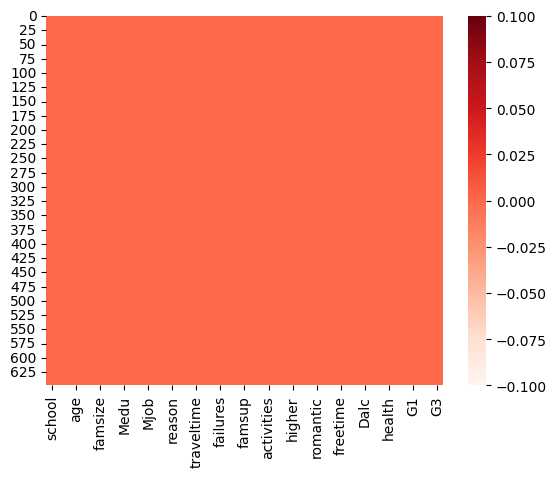

In [444]:
sns.heatmap(df.isnull(), cmap="Reds")

## Plotting Whole Data

C:\Users\Babar\AppData\Local\Temp\ipykernel_9252\4008217497.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col], ax=axes[i])
C:\Users\Babar\AppData\Local\Temp\ipykernel_9252\4008217497.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col], ax=axes[i])
C:\Users\Babar\AppData\Loc

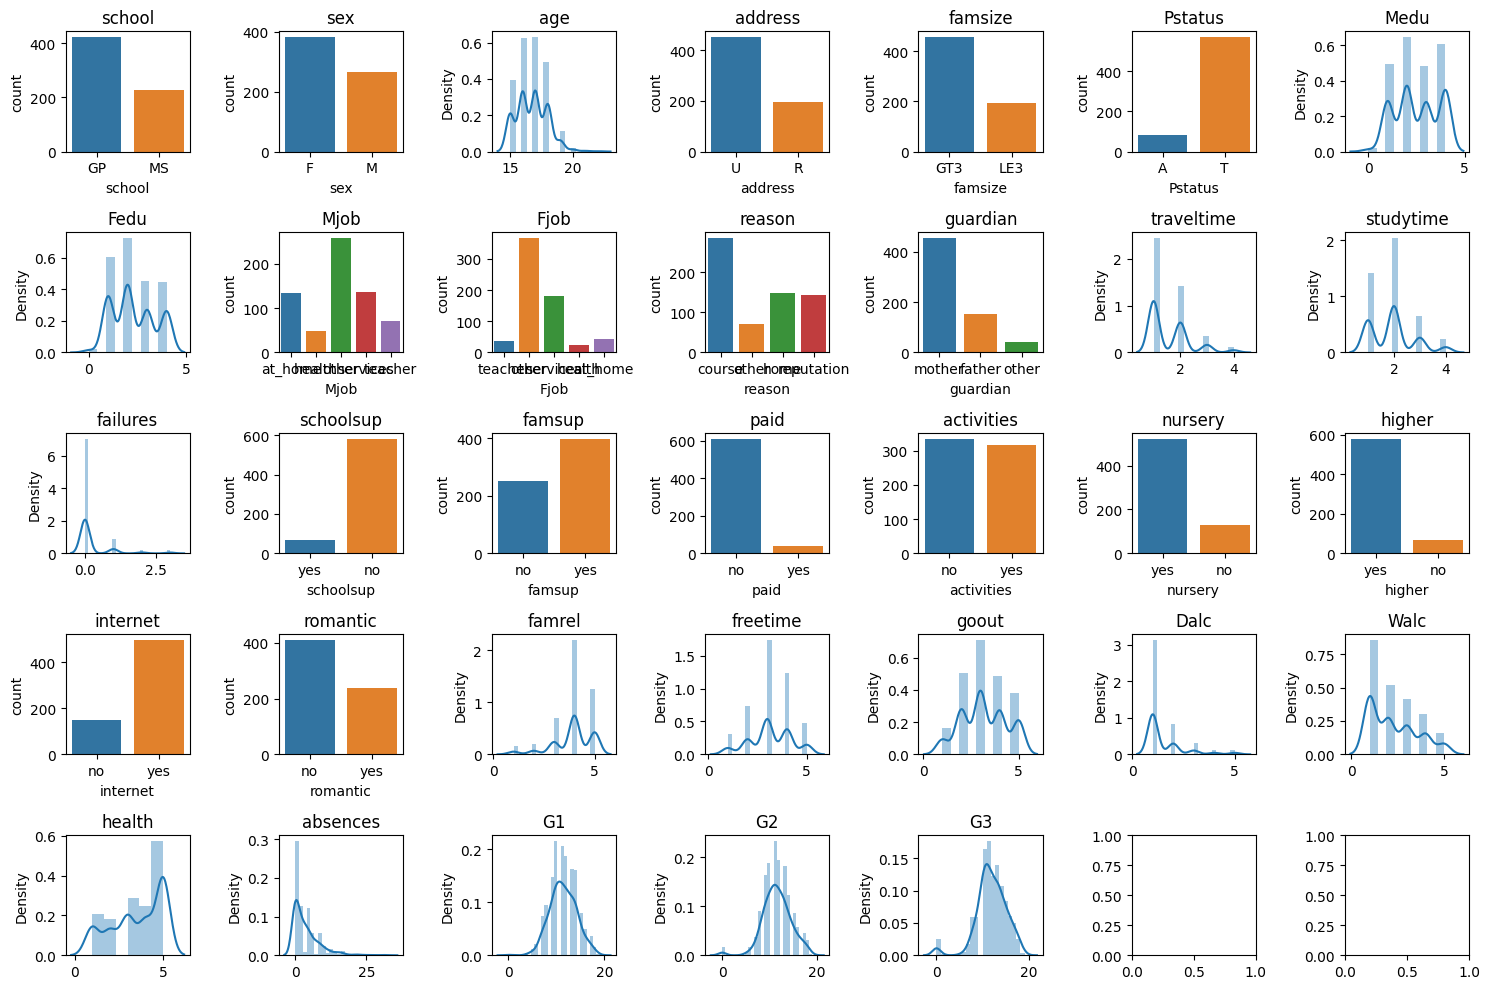

In [445]:
fig, axes = plt.subplots(5, 7, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(df.columns):
    if df[col].dtype == "object":
        sns.countplot(x=df[col], ax=axes[i]) 
    else:
        sns.distplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

## Dividing data into categorical and non_categorical dataset

In [446]:
cat = []
num = []

for col in df.columns:
    if df[col].dtype == "object":
        cat.append(col)
    else:
        num.append(col)
df_cat = df[cat]
df_num = df[num]

### Plotting only categorical data

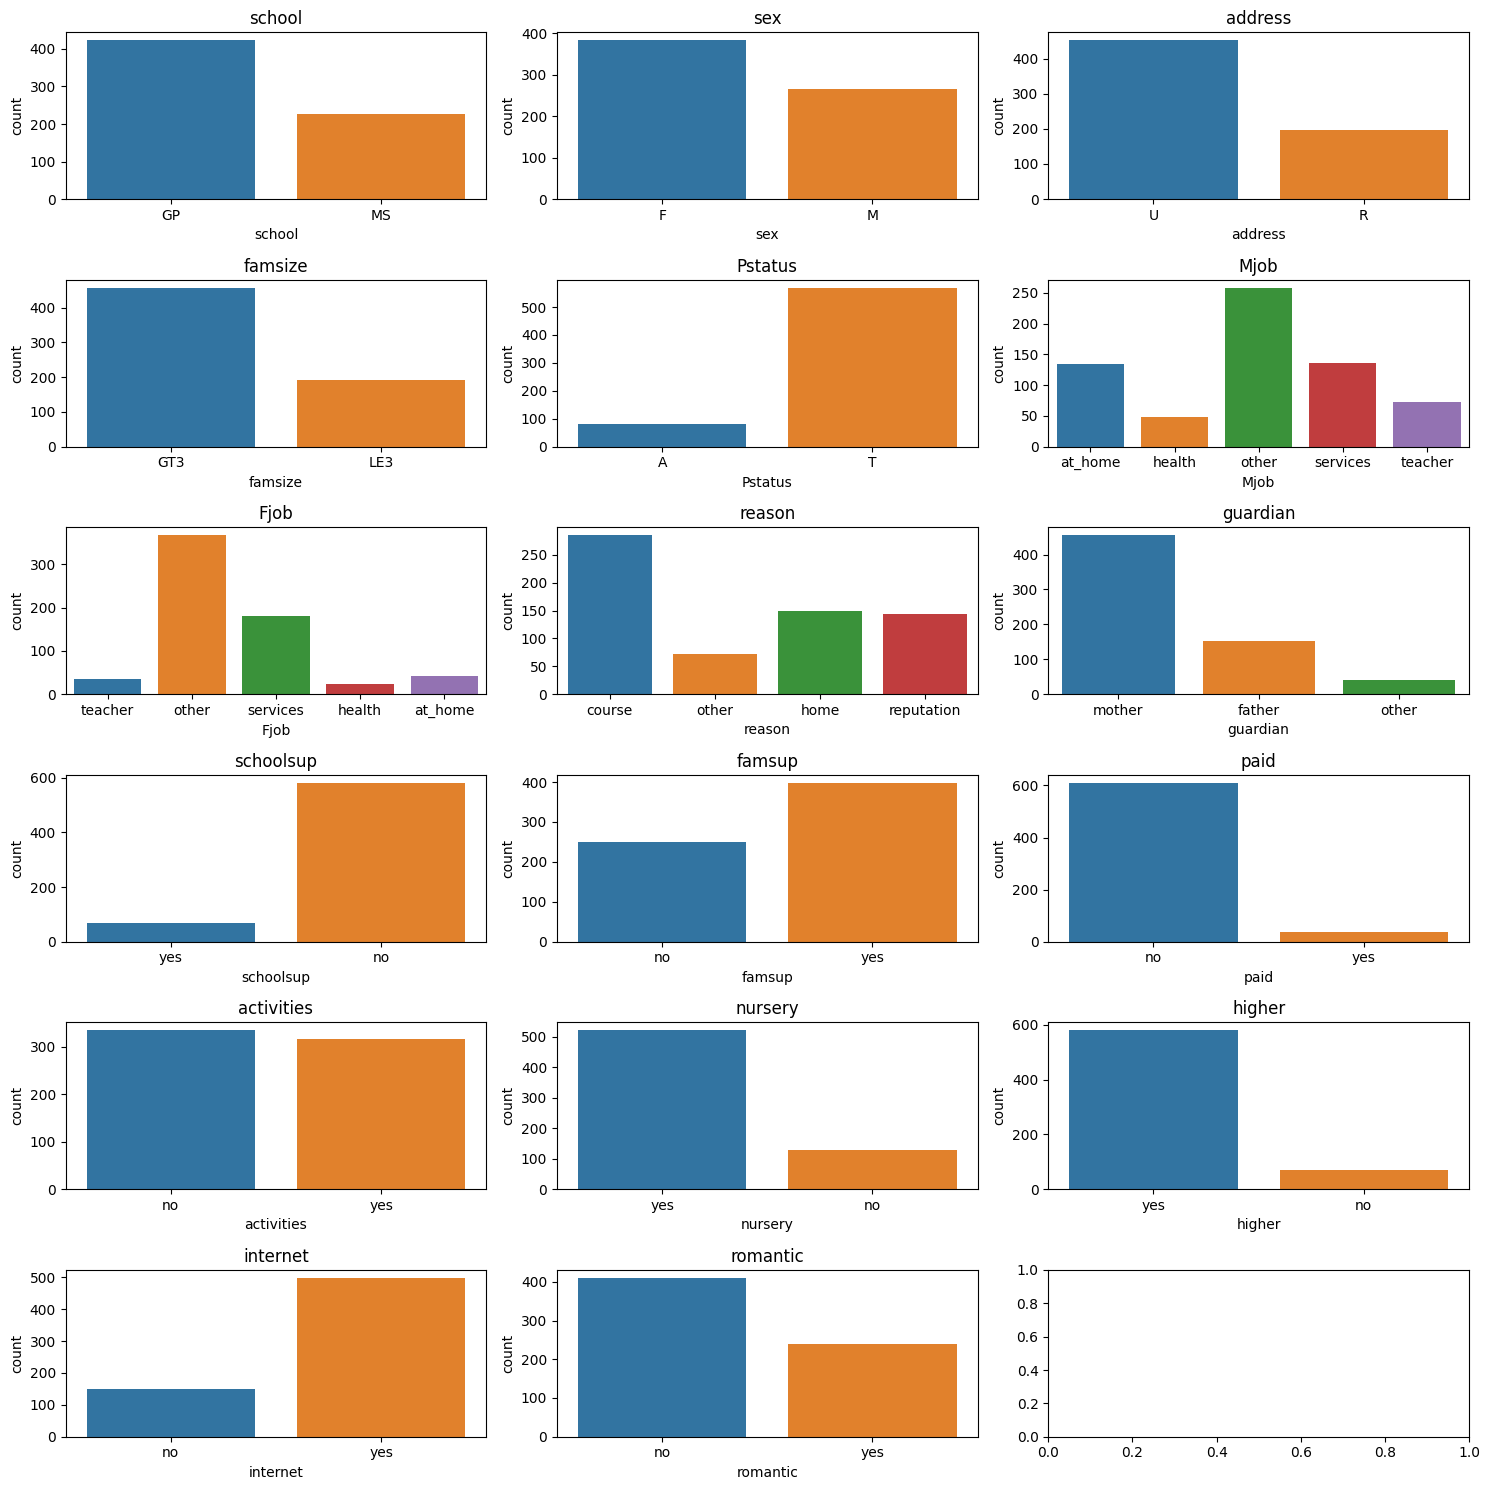

In [447]:
fig, axes = plt.subplots(6, 3, figsize=(15, 15))
axes = axes.ravel()

for i, col in enumerate(df_cat.columns):
    sns.countplot(x=df_cat[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [448]:
df_cat.shape

(649, 17)

### Transforming categorical data into numerical data 

In [449]:
encoder = LabelEncoder()
for col in df_cat.columns:
    df_cat[col] = encoder.fit_transform(df_cat[col])
    encoded_df = pd.DataFrame(df_cat[col].values, columns=[col])
    final_df = pd.concat([df_cat, encoded_df], axis=1)
df_cat = final_df.iloc[:, :-1]
    

C:\Users\Babar\AppData\Local\Temp\ipykernel_9252\1388652614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = encoder.fit_transform(df_cat[col])
C:\Users\Babar\AppData\Local\Temp\ipykernel_9252\1388652614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[col] = encoder.fit_transform(df_cat[col])
C:\Users\Babar\AppData\Local\Temp\ipykernel_9252\1388652614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [450]:
df_cat.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,0,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,0,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,0,0,1,1,0,0


In [451]:
df_cat.shape

(649, 17)

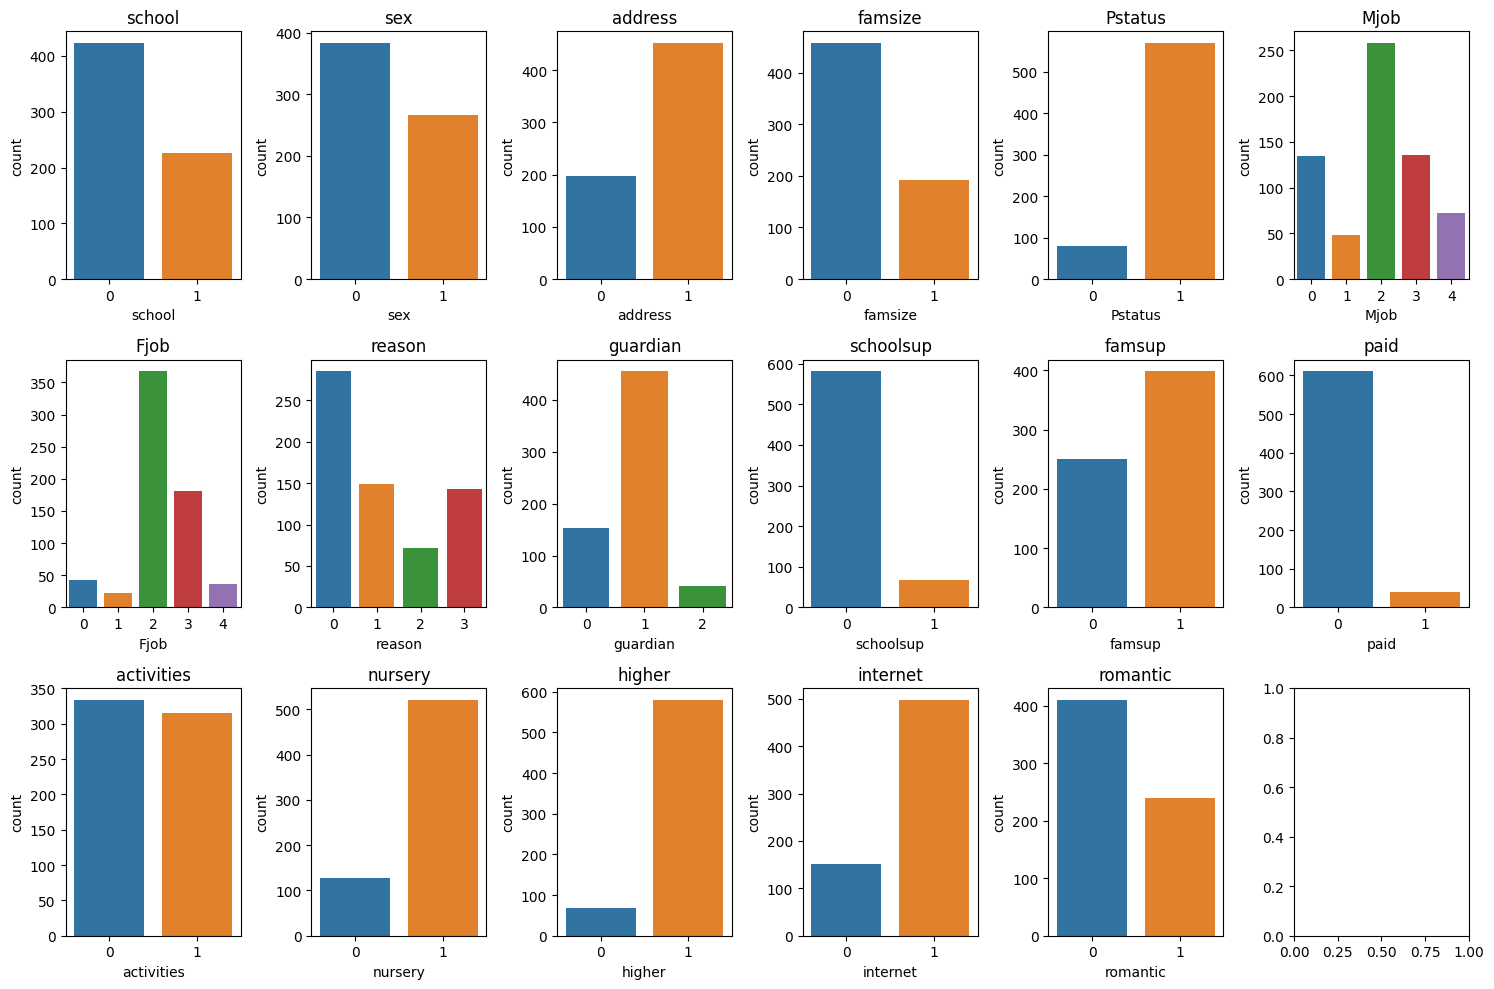

In [452]:
fig, axes = plt.subplots(3, 6, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(df_cat.columns):
    sns.countplot(x=df_cat[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

## Numerical dataset

In [453]:
df_num.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [454]:
df_num.shape

(649, 16)

C:\Users\Babar\AppData\Local\Temp\ipykernel_9252\2204818044.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_num[col], ax=axes[i])
C:\Users\Babar\AppData\Local\Temp\ipykernel_9252\2204818044.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_num[col], ax=axes[i])
C:\Users\Babar\App

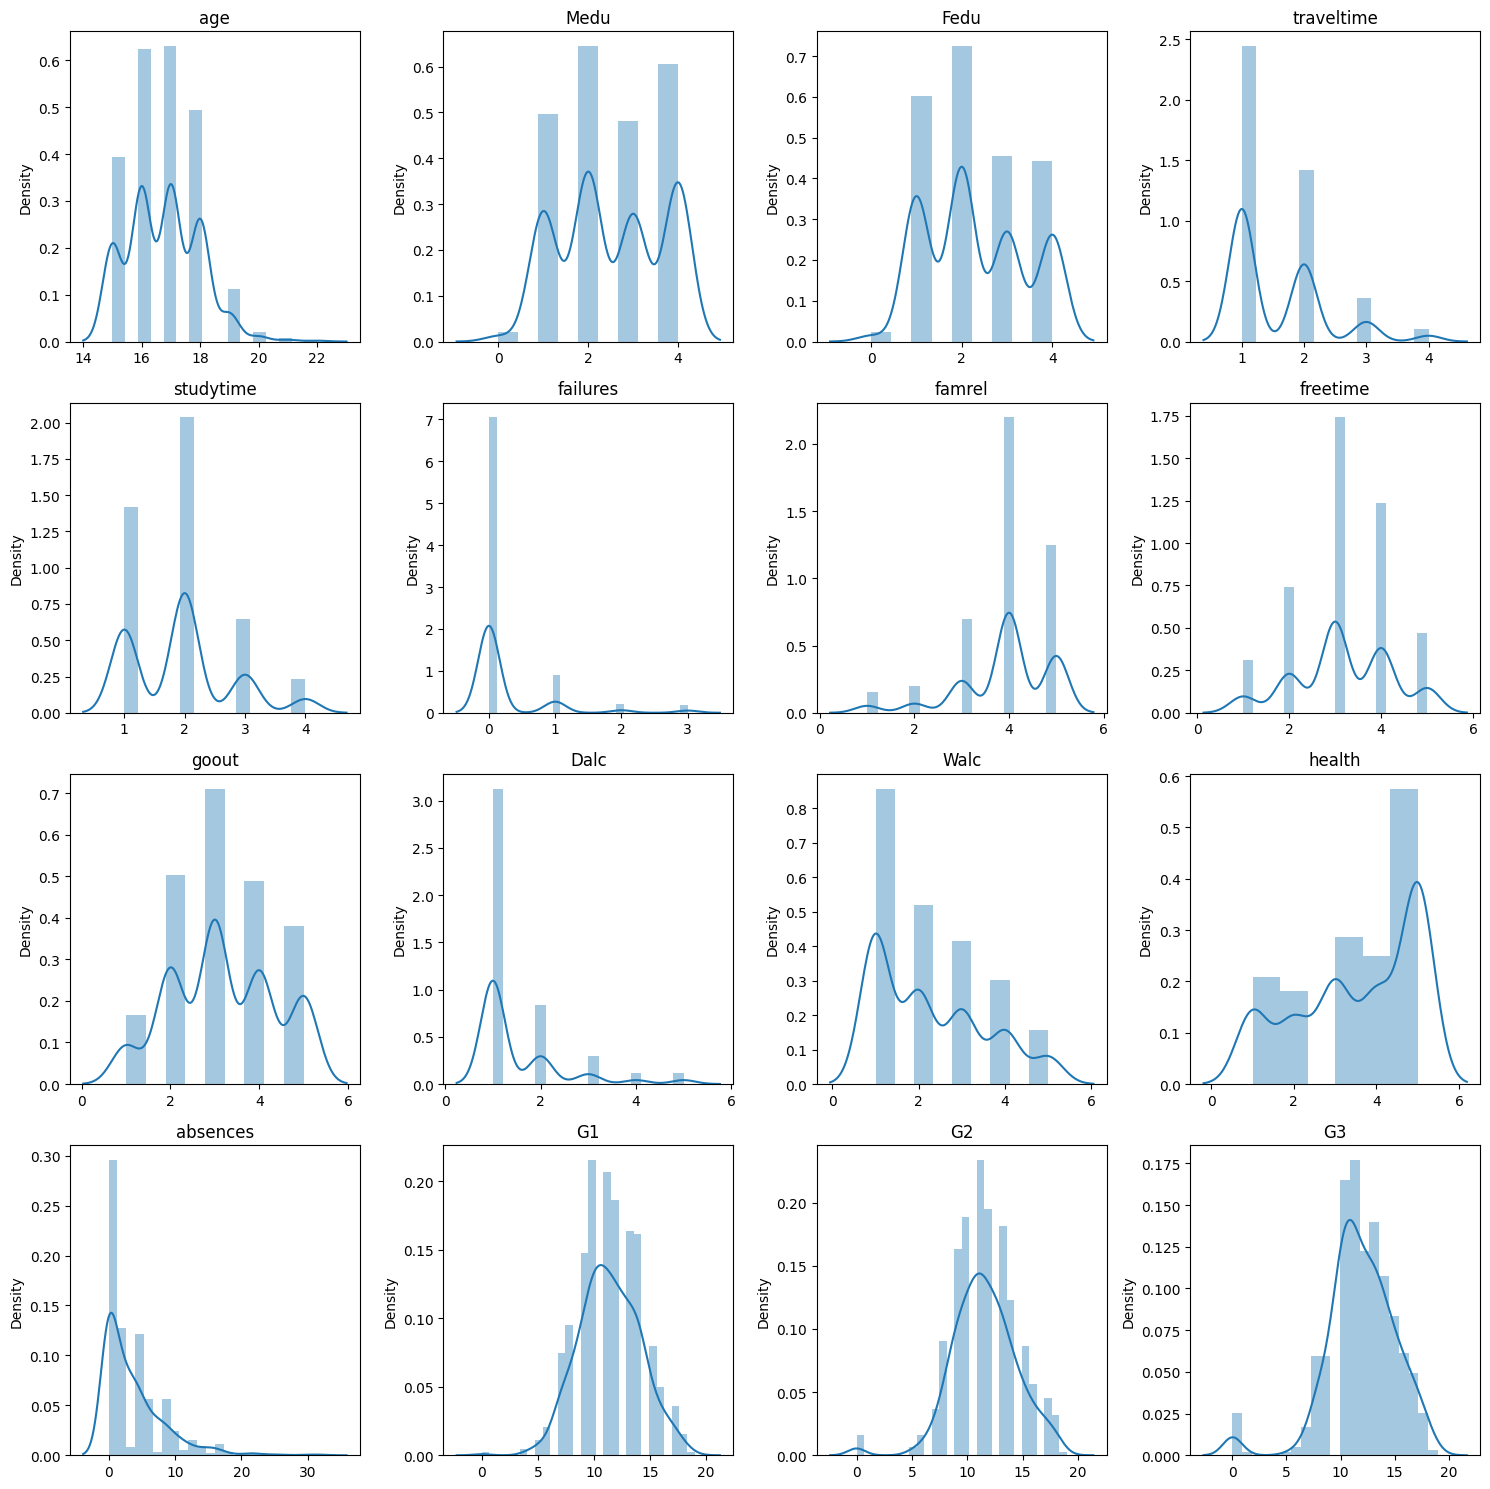

In [455]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
axes = axes.ravel()

for i, col in enumerate(df_num.columns):
    sns.distplot(x=df_num[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

### Categorical features in numerical form

In [456]:
df_num_cat = df_num.iloc[:, 1:12]
df_num_cat.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health
0,4,4,2,2,0,4,3,4,1,1,3
1,1,1,1,2,0,5,3,3,1,1,3
2,1,1,1,2,0,4,3,2,2,3,3
3,4,2,1,3,0,3,2,2,1,1,5
4,3,3,1,2,0,4,3,2,1,2,5


### Concatenating Categorical features

In [457]:
df_cat = pd.concat([df_cat, df_num_cat], axis=1)
df_cat.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health
0,0,0,1,0,0,0,4,0,1,1,...,4,2,2,0,4,3,4,1,1,3
1,0,0,1,0,1,0,2,0,0,0,...,1,1,2,0,5,3,3,1,1,3
2,0,0,1,1,1,0,2,2,1,1,...,1,1,2,0,4,3,2,2,3,3
3,0,0,1,0,1,1,3,1,1,0,...,2,1,3,0,3,2,2,1,1,5
4,0,0,1,0,1,2,2,1,0,0,...,3,1,2,0,4,3,2,1,2,5


## Only numerical features

In [458]:
df_num_o = df_num.iloc[:, [0, 12, 13, 14, 15]]
df_num_o.head()

,age,absences,G1,G2,G3
0,18,4,0,11,11
1,17,2,9,11,11
2,15,6,12,13,12
3,15,0,14,14,14
4,16,0,11,13,13


#### 1. G3

C:\Users\Babar\AppData\Local\Temp\ipykernel_9252\4138270970.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
C:\Users\Babar\AppData\Local\Temp\ipykernel_9252\4138270970.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_num_o["G3"])


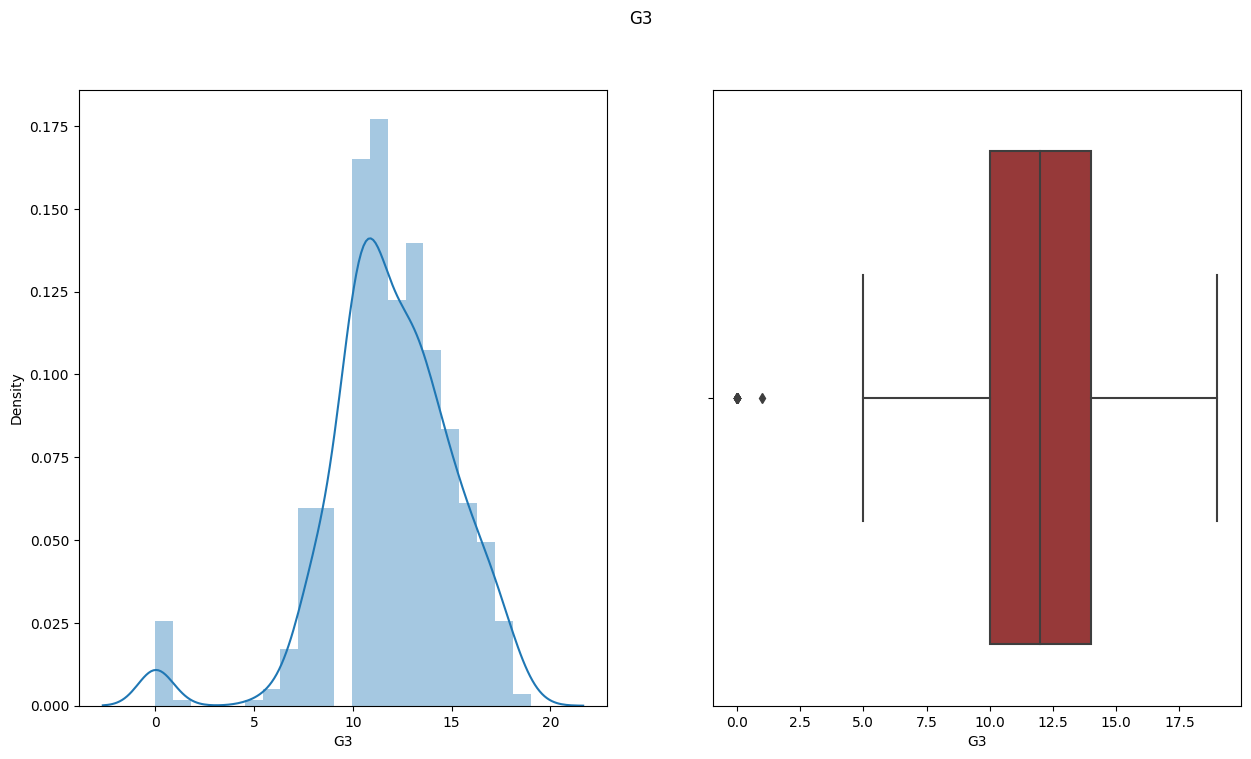

In [459]:
fig = plt.subplots(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.distplot(x=df_num_o["G3"])
plt.xlabel("G3")
plt.subplot(1, 2, 2)
sns.boxplot(x=df_num_o["G3"], color="brown")

plt.subplots_adjust(hspace=0.5)
plt.suptitle("G3");

### 2. G1

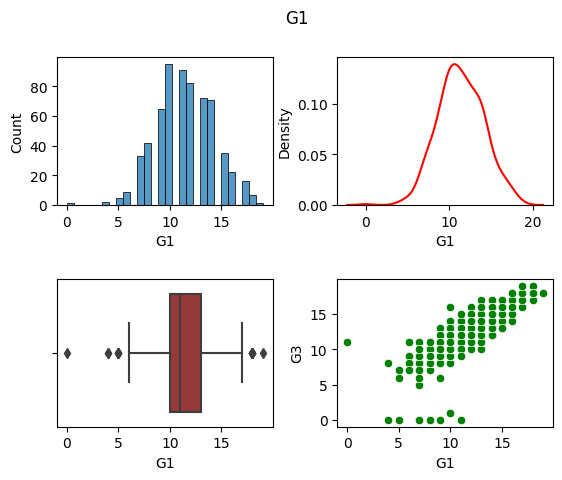

In [460]:
plt.subplot(2, 2, 1)
sns.histplot(x=df_num_o["G1"])
plt.xlabel("G1")
plt.subplot(2, 2, 2)
sns.kdeplot(x=df_num_o["G1"], color="red")
plt.subplot(2, 2, 3)
sns.boxplot(x=df_num_o["G1"], color="brown")
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_num_o["G1"], y=df_num_o["G3"], color="green")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle("G1");

### 3. G2

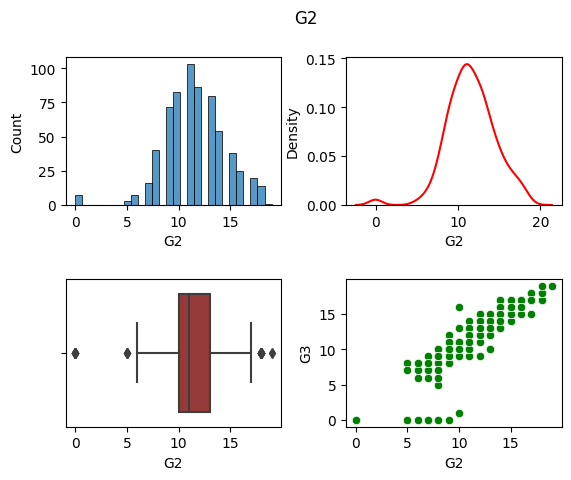

In [461]:
plt.subplot(2, 2, 1)
sns.histplot(x=df_num_o["G2"])
plt.xlabel("G2")
plt.subplot(2, 2, 2)
sns.kdeplot(x=df_num_o["G2"], color="red")
plt.subplot(2, 2, 3)
sns.boxplot(x=df_num_o["G2"], color="brown")
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_num_o["G2"], y=df_num_o["G3"], color="green")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle("G2");

### 3. Absences

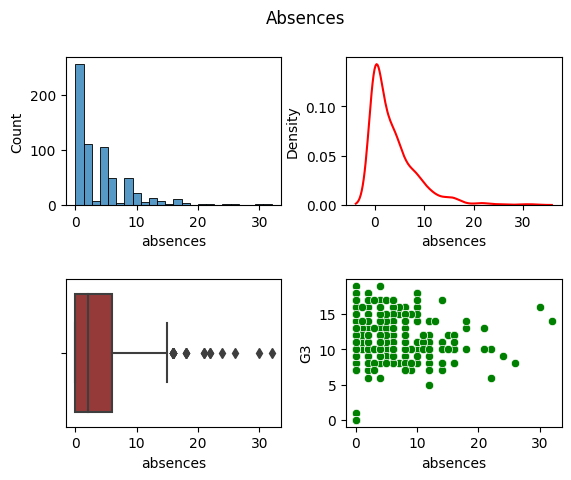

In [462]:
plt.subplot(2, 2, 1)
sns.histplot(x=df_num_o["absences"])
plt.xlabel("absences")
plt.subplot(2, 2, 2)
sns.kdeplot(x=df_num_o["absences"], color="red")
plt.subplot(2, 2, 3)
sns.boxplot(x=df_num_o["absences"], color="brown")
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_num_o["absences"], y=df_num_o["G3"], color="green")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle("Absences");

### 4. Age

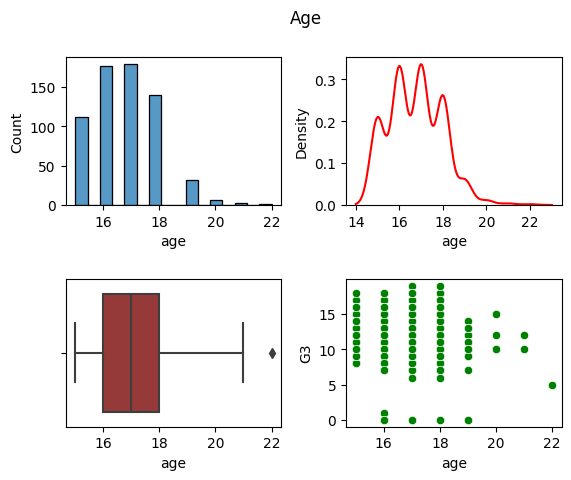

In [463]:
plt.subplot(2, 2, 1)
sns.histplot(x=df_num_o["age"])
plt.xlabel("age")
plt.subplot(2, 2, 2)
sns.kdeplot(x=df_num_o["age"], color="red")
plt.subplot(2, 2, 3)
sns.boxplot(x=df_num_o["age"], color="brown")
plt.subplot(2, 2, 4)
sns.scatterplot(x=df_num_o["age"], y=df_num_o["G3"], color="green")
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.suptitle("Age");

### Removing Outliers

In [464]:
df_num_o.shape

(649, 5)

In [465]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.2)
    Q3 = df[ft].quantile(0.8)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 + 1.5 * IQR
    ls = df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    return ls
index_list = []
for col in df_num_o.columns:
    index_list.extend(outliers(df_num_o, col))
print("list", index_list)
print("list", len(index_list))
final_list = list(set(index_list))
print("Final list", final_list)
print("list", len(final_list)) 

def remove_outliers(df, ls):
    df = df.drop(ls)
    return df

list [279, 299, 351, 407, 413, 414, 421, 506, 574, 16, 40, 44, 79, 100, 103, 105, 112, 113, 118, 131, 135, 137, 143, 150, 155, 161, 169, 179, 197, 202, 206, 211, 212, 217, 219, 225, 227, 230, 231, 235, 253, 254, 255, 256, 259, 262, 263, 273, 274, 275, 279, 310, 311, 312, 318, 324, 325, 326, 329, 330, 365, 369, 397, 403, 405, 408, 413, 416, 418, 419, 420, 423, 477, 491, 500, 535, 537, 574, 635, 0, 15, 47, 60, 113, 181, 196, 240, 327, 332, 335, 337, 338, 344, 349, 374, 378, 499, 549, 594, 595, 596, 606, 617, 636, 15, 47, 113, 181, 185, 196, 240, 314, 327, 332, 335, 337, 338, 343, 344, 349, 374, 378, 410, 412, 416, 417, 420, 427, 440, 509, 510, 549, 563, 567, 594, 595, 596, 597, 603, 605, 606, 610, 617, 630, 636, 641, 113, 163, 172, 181, 185, 314, 327, 332, 337, 338, 349, 416, 440, 509, 519, 549, 563, 567, 583, 586, 594, 596, 597, 603, 605, 606, 610, 617, 626, 636, 637, 639, 640]
list 179
Final list [0, 519, 15, 16, 535, 537, 549, 40, 44, 47, 563, 567, 60, 574, 583, 586, 79, 594, 595, 596

In [466]:
df_num_o = remove_outliers(df_num_o, final_list)

In [467]:
df_num_o.shape

(522, 5)

In [468]:
df_cat.shape

(649, 28)

In [469]:
df_cat = df_cat.iloc[df_num_o.index]

In [470]:
df_cat.shape

(522, 28)

In [473]:
df_cat.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health
1,0,0,1,0,1,0,2,0,0,0,...,1,1,2,0,5,3,3,1,1,3
2,0,0,1,1,1,0,2,2,1,1,...,1,1,2,0,4,3,2,2,3,3
3,0,0,1,0,1,1,3,1,1,0,...,2,1,3,0,3,2,2,1,1,5
4,0,0,1,0,1,2,2,1,0,0,...,3,1,2,0,4,3,2,1,2,5
5,0,1,1,1,1,3,2,3,1,0,...,3,1,2,0,5,4,2,1,2,5


In [474]:
df_num_o.head()

,age,absences,G1,G2,G3
1,17,2,9,11,11
2,15,6,12,13,12
3,15,0,14,14,14
4,16,0,11,13,13
5,16,6,12,12,13


In [477]:
df = pd.concat([df_cat, df_num_o], axis=1)

In [478]:
df.shape

(522, 33)

In [479]:
ss = StandardScaler()
data_scaled  = ss.fit_transform(df)
df_scaled = pd.DataFrame(data_scaled,columns=df.columns)
df = df_scaled

In [480]:
df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,freetime,goout,Dalc,Walc,health,age,absences,G1,G2,G3
0,-0.756498,-0.853509,0.673824,-0.664822,0.353553,-1.558165,-0.241505,-0.900975,-1.611860,-0.353553,...,-0.166662,-0.152002,-0.519216,-0.970769,-0.366880,0.364014,-0.213157,-0.966346,-0.221483,-0.431077
1,-0.756498,-0.853509,0.673824,1.504161,0.353553,-1.558165,-0.241505,0.815481,0.391452,2.828427,...,-0.166662,-1.014451,0.639035,0.593248,-0.366880,-1.387277,1.290462,0.288462,0.651075,-0.005704
2,-0.756498,-0.853509,0.673824,-0.664822,0.353553,-0.757612,0.915059,-0.042747,0.391452,-0.353553,...,-1.122679,-1.014451,-0.519216,-0.970769,1.010899,-1.387277,-0.964966,1.125000,1.087354,0.845041
3,-0.756498,-0.853509,0.673824,-0.664822,0.353553,0.042942,-0.241505,-0.042747,-1.611860,-0.353553,...,-0.166662,-1.014451,-0.519216,-0.188761,1.010899,-0.511632,-0.964966,-0.129808,0.651075,0.419668
4,-0.756498,1.171634,0.673824,1.504161,0.353553,0.843495,-0.241505,1.673708,0.391452,-0.353553,...,0.789355,-1.014451,-0.519216,-0.188761,1.010899,-0.511632,1.290462,0.288462,0.214796,0.419668


In [482]:
y = df["G3"]
X = df.drop(columns=["G3"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [484]:
model = LinearRegression().fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.2587807260849347
R2 Score 0.8890742279007504
MAE 0.28343599616199633
R2 Score 0.849005866839714


## Ridge

In [488]:
model = Ridge().fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.2587992047392839
R2 Score 0.8890674839219769
MAE 0.2831512169471246
R2 Score 0.8491226050521307


## Ridge with Hyperparameter

In [498]:
model = Ridge(alpha=5).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.2590357961205534
R2 Score 0.8889249087574929
MAE 0.2821790633789606
R2 Score 0.8494296829281067


## Ridge "sparse_cg"

In [502]:
model = Ridge(alpha=5, solver="sparse_cg", max_iter=1000).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.25902791100899103
R2 Score 0.888924854819678
MAE 0.28219859571628436
R2 Score 0.8494042259824944


## Ridge "sag"

In [506]:
model = Ridge(alpha=5, solver="sag", max_iter=1000).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.2590324039343758
R2 Score 0.8889247371608703
MAE 0.2821829742889358
R2 Score 0.8494340058155864


## Ridge "saga"

In [504]:
model = Ridge(alpha=5, solver="saga", max_iter=1000).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.25903769605389915
R2 Score 0.8889235484805663
MAE 0.28218075060210845
R2 Score 0.8494240330361297


## SGD Regressor

In [499]:
model = SGDRegressor().fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.2625630045203574
R2 Score 0.8868524414223008
MAE 0.28785554256365053
R2 Score 0.8437791294587742


## SGD Regressor as Ridge

In [557]:
model = SGDRegressor(penalty="l2", eta0=0.0001, learning_rate="constant", max_iter=10000, alpha=0.001).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.290219947727416
R2 Score 0.864317208419646
MAE 0.3173899755500511
R2 Score 0.8261940974961871


## Lasso with Hyperparameter

In [572]:
model = Lasso(alpha=0.009).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.2613927919948013
R2 Score 0.8866792336663989
MAE 0.2786665884463936
R2 Score 0.8533331366402144


## SGD Regressor as Lasso

In [583]:
model = SGDRegressor(penalty="l1", eta0=0.0001, learning_rate="constant", max_iter=10000, alpha=0.001).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.29016339251724943
R2 Score 0.8642684724248764
MAE 0.3174555745951965
R2 Score 0.8262646707139583


## Decision Tree Regressor

In [596]:
model = DecisionTreeRegressor(splitter="best", max_depth=7, min_samples_split=15, min_samples_leaf=15).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.2475852925408947
R2 Score 0.8967655746883934
MAE 0.3040626647886675
R2 Score 0.826772437373356


## Random Forest Regressor

In [627]:
model = RandomForestRegressor(n_estimators=1000, max_depth=25, min_samples_split=45, min_samples_leaf=15, max_leaf_nodes=100).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
print("MAE", mean_absolute_error(y_pred_train, y_train))
print("R2 Score", r2_score(y_train, y_pred_train))
y_pred_test = model.predict(X_test)
print("MAE", mean_absolute_error(y_pred_test, y_test))
print("R2 Score", r2_score(y_test, y_pred_test))

MAE 0.2657478705033537
R2 Score 0.8814030155722785
MAE 0.2835072911311488
R2 Score 0.8526688015762411
